# Introduction
<p>
This notebook loads your normalized dataset as an expression matrix (rows are genes, columns are experimental samples).<br>
</p>

# Setup

In [1]:
# Libraries
%matplotlib inline
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import re,os
from sklearn.decomposition import PCA
import numpy as np

In [2]:
DATA_DIR = '../../data/raw_data'

# Workflow
1. Load each dataset separately
2. clean up row names (genes) and col names (expt IDs) separately
3. merge matrices when done
4. save raw matrices to file
5. for those that need batch correction use ComBat (start a new R notebook, load raw matrices and ComBat, process)

# Load the normalized data

## RyhB/RcsC

In [3]:
raw_data = pd.read_csv(os.path.join('../../data/rcsC_data2/rcsC.csv'),sep='\t',header=0,index_col=0)

In [4]:
data0 = np.log2(raw_data)

## MA-1 (GPL199-gardner)

In [5]:
file1 = os.path.join(DATA_DIR,'GPL199-gardner_raw.csv')
data1 = pd.read_csv(file1, index_col=0, sep='\t')

In [6]:
data1.head()

,GSM157409.CEL.gz,GSM157410.CEL.gz,GSM157411.CEL.gz,GSM157412.CEL.gz,GSM157413.CEL.gz,GSM157414.CEL.gz,GSM157415.CEL.gz,GSM157416.CEL.gz,GSM157417.CEL.gz,GSM157418.CEL.gz,...,GSM157665.CEL.gz,GSM157666.CEL.gz,GSM157667.CEL.gz,GSM157668.CEL.gz,GSM157669.CEL.gz,GSM157670.CEL.gz,GSM157671.CEL.gz,GSM157672.CEL.gz,GSM157673.CEL.gz,GSM157674.CEL.gz
aas_b2836_at,9.342766,9.201356,9.314911,9.319381,9.253822,9.228538,9.268142,9.289740,9.225142,9.182340,...,9.673591,9.210537,9.379250,9.172287,9.256265,9.100902,8.842291,8.979541,8.797686,9.091810
aat_b0885_at,9.209934,9.066565,8.943739,8.979736,8.879491,8.974648,8.967528,9.090933,8.860498,9.019974,...,8.948031,8.806742,8.721721,8.647951,8.583109,8.749637,8.957051,9.089876,9.096147,9.103628
abc_b0199_at,9.078614,9.097929,9.081450,8.931829,9.056230,9.143998,9.212238,9.152872,9.144015,9.021278,...,7.886624,8.860093,8.803897,9.345583,9.323764,10.639094,10.587711,9.923866,9.680403,8.869939
abrB_b0715_at,8.344604,8.165928,8.237828,8.231992,8.080676,8.264952,8.241599,8.033208,8.140073,8.221465,...,8.526533,8.191441,8.083708,8.607439,8.423046,8.261588,8.075246,8.089980,8.017587,8.204232
accA_b0185_at,9.946267,10.076498,9.944386,10.155231,10.244432,10.330571,10.083651,10.249241,10.241335,10.226894,...,9.340010,10.179089,10.427887,10.118593,10.167719,10.045009,9.610640,9.122338,9.480715,8.851676


## MA-2 (GPL199-palsson)

In [7]:
file2 = os.path.join(DATA_DIR,'GPL199-palsson_raw.csv')
data2 = pd.read_csv(file2, index_col=0, sep='\t')

In [8]:
data2.head()

,GSM1334755_affyexp_delta-arcA_glucose_NH4CL_anaerobic_1.CEL.gz,GSM1334756_affyexp_delta-arcA_glucose_NH4CL_anaerobic_2.CEL.gz,GSM1334757_affyexp_delta-arcA_glucose_NH4CL_anaerobic_3.CEL.gz,GSM1334758_affyexp_delta-fnr_glucose_NH4CL_anaerobic_1.CEL.gz,GSM1334759_affyexp_delta-fnr_glucose_NH4CL_anaerobic_2.CEL.gz,GSM1334760_affyexp_delta-fnr_glucose_NH4CL_anaerobic_3.CEL.gz,GSM1334761_affyexp_wt_glucose_NH4CL_anaerobic_1.CEL.gz,GSM1334762_affyexp_wt_glucose_NH4CL_anaerobic_2.CEL.gz,GSM1334763_affyexp_wt_glucose_NH4CL_anaerobic_3.CEL.gz,GSM18235.CEL.gz,...,GSM820909.CEL.gz,GSM820910.CEL.gz,GSM820911.CEL.gz,GSM820912.CEL.gz,GSM820913.CEL.gz,GSM820914.CEL.gz,GSM820915.CEL.gz,GSM820916.CEL.gz,GSM820917.CEL.gz,GSM820918.CEL.gz
aas_b2836_at,8.960747,8.854062,9.115021,9.119909,9.038158,9.005761,9.018273,9.083917,9.012501,9.262174,...,8.943429,9.170613,9.119128,9.615508,9.205138,9.263583,9.332603,9.183229,9.146211,9.073806
aat_b0885_at,9.011933,8.930749,8.932812,9.407453,9.503453,9.464863,8.875408,8.977388,9.012832,8.880013,...,8.847701,8.979577,9.208876,9.384975,9.329851,9.702192,9.583374,9.407918,8.896319,8.636600
abc_b0199_at,9.931637,9.509882,9.529934,9.449296,9.653481,9.555737,10.782316,10.750900,10.693261,9.817680,...,9.611607,9.448660,9.529638,8.941470,8.559080,8.412303,8.406813,9.096014,9.940057,10.080679
abrB_b0715_at,7.923879,8.027062,8.006508,8.064571,7.974422,7.859409,8.241841,8.334980,8.365319,7.876230,...,8.138758,7.988686,8.206903,8.350950,8.517758,8.040632,7.706377,8.240712,8.113705,8.145922
accA_b0185_at,9.880037,9.804569,9.681852,9.781207,10.061351,9.967737,10.003118,9.611042,10.030483,9.736454,...,10.043414,10.183337,10.095826,9.265695,9.213367,8.930634,9.218719,9.393290,9.978359,10.119250


## MA-3 (GPL3154-palsson)

In [9]:
file3 = os.path.join(DATA_DIR,'GPL3154-palsson_raw.csv')
data3 = pd.read_csv(file3, index_col=0, sep='\t')

In [10]:
data3.head()

,GSM1334746_affyexp_delta-arcA_glucose_NH4Cl_NO3_1.CEL.gz,GSM1334747_affyexp_delta-arcA_glucose_NH4Cl_NO3_2.CEL.gz,GSM1334748_affyexp_delta-arcA_glucose_NH4Cl_NO3_3.CEL.gz,GSM1334749_affyexp_delta-fnr_glucose_NH4Cl_NO3_1.CEL.gz,GSM1334750_affyexp_delta-fnr_glucose_NH4Cl_NO3_2.CEL.gz,GSM1334751_affyexp_delta-fnr_glucose_NH4Cl_NO3_3.CEL.gz,GSM1334752_affyexp_wt_glucose_NH4Cl_NO3_1.CEL.gz,GSM1334753_affyexp_wt_glucose_NH4Cl_NO3_2.CEL.gz,GSM1334754_affyexp_wt_glucose_NH4Cl_NO3_3.CEL.gz,GSM2915189_6731.WG1.jv.CEL.gz,...,GSM654478.CEL.gz,GSM654479.CEL.gz,GSM654480.CEL.gz,GSM654481.CEL.gz,GSM852195_6722.Palsson.PP1.jv.CEL.gz,GSM852196_6723.Palsson.PP2.jv.CEL.gz,GSM852197_6724.Palsson.PP3.jv.CEL.gz,GSM852198_6725.Palsson.PG1.jv.CEL.gz,GSM852199_6726.Palsson.PG2.jv.CEL.gz,GSM852200_6727.Palsson.PG3.jv.CEL.gz
1759068_at,5.253061,5.267608,5.553997,5.233549,5.534953,5.734140,5.565163,5.585198,5.424524,5.503479,...,4.500205,4.442926,4.523253,4.949051,5.321851,5.598481,5.749743,5.731900,6.019094,5.950603
1759069_at,9.047166,8.886794,8.870981,9.064552,8.825647,9.159480,8.989927,9.075111,9.078747,8.973711,...,8.396930,8.610141,8.079523,8.255924,8.957768,9.039119,8.979743,9.351636,9.379631,9.339428
1759070_s_at,8.351725,8.365798,8.438287,8.394957,8.339388,8.250664,8.354327,8.427532,8.382988,8.193124,...,8.641179,8.605355,8.245954,8.318527,8.027427,8.189603,8.083881,7.843167,8.116368,8.148381
1759071_s_at,7.360199,7.433809,7.027248,7.328243,7.062569,7.282808,7.570246,7.598495,7.548946,6.686869,...,8.295069,8.461876,7.748136,8.433085,7.840089,7.147201,6.865896,6.607721,6.556610,6.632703
1759072_s_at,4.808170,5.001860,5.260173,5.083165,5.090995,4.962419,4.634798,5.012195,4.290328,5.247126,...,3.848589,3.866708,4.135604,3.612535,4.318762,5.363123,5.105126,5.160535,5.237623,5.346726


## RNAseq-1 (PRECISE dataset)

In [11]:
file4 = os.path.join(DATA_DIR,'precise_all_genes.csv')
data4 = pd.read_csv(file4, index_col=0)

In [12]:
data4.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
b0001,7.620280,7.305310,0.000000,1.751329,4.400751,4.615842,0.000000,0.000000,4.579639,5.607577,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
b0002,11.005124,11.128904,11.704291,11.887502,11.063794,10.777901,9.975667,10.290358,11.228441,11.212458,...,10.270802,10.275862,11.147591,11.169958,11.675933,11.725377,11.880672,11.922383,11.495545,11.551878
b0003,10.414126,10.521846,11.423174,11.803066,10.775968,10.596640,9.596099,10.190726,10.896613,10.859550,...,10.159766,10.116157,10.313375,10.391632,10.915755,10.908557,11.023067,11.037573,10.623436,10.763312
b0004,10.593343,10.723770,10.456609,10.778447,10.393956,10.112779,8.740884,9.081455,10.183826,10.163048,...,10.474544,10.433648,10.678594,10.723334,11.142639,11.112000,11.183938,11.240992,10.952340,11.000123
b0005,6.314592,6.257223,5.421483,5.335423,6.715062,6.409706,4.626244,4.755404,6.526342,6.134583,...,5.978562,5.704895,6.305184,6.290728,5.057886,4.834855,5.447259,5.757113,5.873113,5.807750


## RNAseq-2 (GSE96706)

In [13]:
file5 = os.path.join(DATA_DIR,'GSE96706_log_tpm.csv')
data5 = pd.read_csv(file5, index_col=0)

In [14]:
data5.head()

,kan1__kan__1,kan1__kan__2,kan1__kan__3,kan4__kan__1,kan4__kan__2,kan4__kan__3,amp7__amp__1,amp7__amp__2,amp7__amp__3,wt__ctrl1__1,...,tob9__tob__3,wt__ctrl2__1,wt__ctrl2__2,wt__ctrl2__3,wt__ctrl3__1,wt__ctrl3__2,wt__ctrl3__3,wt__ctrl4__1,wt__ctrl4__2,wt__ctrl4__3
b2219,2.908065,2.357366,2.783458,3.188635,3.618663,3.564624,3.262697,3.690560,3.043246,3.824683,...,2.114775,2.554280,2.557668,2.084267,3.250224,3.239176,3.347709,2.377733,3.221947,2.653140
b1102,2.510261,2.298651,1.919082,2.171360,2.265632,2.214680,3.358520,3.505180,3.513498,2.844358,...,1.810528,1.939293,1.943773,1.809336,2.542617,2.249187,2.281586,2.759254,2.354081,2.608298
b0001,8.385767,8.383016,7.523231,6.129525,6.397983,5.878996,7.744469,7.293337,7.056076,8.379259,...,10.275247,8.049419,7.607808,8.502385,8.745939,8.596885,9.663508,7.500950,7.728581,8.380484
b0002,7.782507,7.380953,7.464649,7.150622,6.381116,7.083101,7.742982,7.213957,7.417739,4.993740,...,7.676592,6.315495,6.657929,6.680985,5.677303,4.761454,5.646057,6.204586,5.788417,5.924459
b0003,7.527682,7.990873,7.396548,7.515064,6.588954,7.520813,7.743516,7.316918,7.388446,6.182216,...,6.902956,6.365949,6.528541,6.653388,5.681855,5.157885,5.635266,5.696617,6.288043,5.706787


# Clean up the matrix
To make it easier to manipulate and keep track of your data, you may wish to rename the row names to gene identifiers (b-numbers in this case) and column names to experimental identifiers (e.g. from a metadata sheet if you have one)

In [15]:
data1.columns[:5]

Index(['GSM157409.CEL.gz', 'GSM157410.CEL.gz', 'GSM157411.CEL.gz',
       'GSM157412.CEL.gz', 'GSM157413.CEL.gz'],
      dtype='object')

In [16]:
data2.columns[:5]

Index(['GSM1334755_affyexp_delta-arcA_glucose_NH4CL_anaerobic_1.CEL.gz',
       'GSM1334756_affyexp_delta-arcA_glucose_NH4CL_anaerobic_2.CEL.gz',
       'GSM1334757_affyexp_delta-arcA_glucose_NH4CL_anaerobic_3.CEL.gz',
       'GSM1334758_affyexp_delta-fnr_glucose_NH4CL_anaerobic_1.CEL.gz',
       'GSM1334759_affyexp_delta-fnr_glucose_NH4CL_anaerobic_2.CEL.gz'],
      dtype='object')

In [17]:
data3.columns[:5]

Index(['GSM1334746_affyexp_delta-arcA_glucose_NH4Cl_NO3_1.CEL.gz',
       'GSM1334747_affyexp_delta-arcA_glucose_NH4Cl_NO3_2.CEL.gz',
       'GSM1334748_affyexp_delta-arcA_glucose_NH4Cl_NO3_3.CEL.gz',
       'GSM1334749_affyexp_delta-fnr_glucose_NH4Cl_NO3_1.CEL.gz',
       'GSM1334750_affyexp_delta-fnr_glucose_NH4Cl_NO3_2.CEL.gz'],
      dtype='object')

In [18]:
data4.columns[:5]

Index(['control__wt_glc__1', 'control__wt_glc__2', 'fur__wt_dpd__1',
       'fur__wt_dpd__2', 'fur__wt_fe__1'],
      dtype='object')

In [19]:
data5.columns[:5]

Index(['kan1__kan__1', 'kan1__kan__2', 'kan1__kan__3', 'kan4__kan__1',
       'kan4__kan__2'],
      dtype='object')

## Load the experiment IDs from text file

In [20]:
data1_id_file = os.path.join(DATA_DIR,'GPL199-gardner_exptIDs.txt')
data2_id_file = os.path.join(DATA_DIR,'GPL199-palsson_exptIDs.txt')
data3_id_file = os.path.join(DATA_DIR,'GPL3154-palsson_exptIDs.txt')

data1_ids = pd.read_csv(data1_id_file, header=None, index_col=0, sep='\t')[1].tolist()
data2_ids = pd.read_csv(data2_id_file, header=None, index_col=0, sep='\t')[1].tolist()
data3_ids = pd.read_csv(data3_id_file, header=None, index_col=0, sep='\t')[1].tolist()

In [21]:
# Check that all ids are unique
assert(len(set(data1_ids+data2_ids+data3_ids)) == len(data1_ids+data2_ids+data3_ids))

## MA-1 (GPL199-gardner)

In [22]:
# Obtain all genes with b-numbers
bnums = [re.search('(b\d{4})', x).group(1) if re.search('(b\d{4})', x) != None else None for x in data1.index]

# Sort index by order of gene b-numbers
dataset1 = data1.copy()
dataset1.index = bnums

# Strip out all genes without b-numbers
dataset1 = dataset1[dataset1.index.notnull()]
dataset1 = dataset1.sort_index()

# Rename columns
dataset1.columns = data1_ids

In [23]:
print(dataset1.shape)
dataset1.head()

(4345, 266)


,dinI___U_N0025_r1,dinI___U_N0025_r2,dinI___U_N0025_r3,dinP___U_N0025_r1,dinP___U_N0025_r2,dinP___U_N0025_r3,lexA___U_N0025_r1,lexA___U_N0025_r2,lexA___U_N0025_r3,lon___U_N0025_r1,...,ik_L2_T8_r1,ik_H2_T2.5_r1,ik_H2_T3_r1,ik_H2_T3.5_r1,ik_H2_T4_r1,ik_H2_T4.5_r1,ik_H2_T5_r1,ik_H2_T5.5_r1,ik_H2_T6_r1,ik_H2_T8_r1
b0001,6.925976,6.902768,6.868047,6.542187,6.919708,6.922811,6.897204,6.778408,7.098067,6.826361,...,6.395982,7.180179,6.881079,6.907840,8.613213,8.336083,9.525448,8.189322,9.026793,7.235552
b0002,9.376858,9.327645,9.419473,9.550746,9.662969,9.529263,9.780731,9.717635,9.668948,9.632939,...,9.373129,9.444042,9.366874,10.195578,10.678542,9.086723,9.093748,9.146396,8.926385,8.648465
b0003,9.005177,8.903130,9.024258,9.049443,9.179497,9.065352,9.296579,9.212604,9.247836,9.141165,...,8.949927,8.835291,8.992362,9.436677,10.053401,8.714438,8.773232,8.808022,8.695197,8.813985
b0004,9.033057,9.142280,9.142958,9.180045,9.360419,9.125290,9.298451,9.254207,9.352308,9.375969,...,9.082357,8.945079,9.529913,9.658601,10.418542,8.540336,9.056585,8.781075,8.690296,8.268434
b0005,8.056560,8.112147,8.075859,7.997213,8.266737,8.029975,8.176854,8.325174,8.177791,8.145349,...,8.150362,7.977273,8.112632,8.100963,8.279698,8.167063,8.107192,8.310112,8.163198,8.260468


## MA-2 (GPL199-palsson)

In [24]:
# Obtain all genes with b-numbers
bnums = [re.search('(b\d{4})',x).group(1) if re.search('(b\d{4})',x) != None else None for x in data2.index]

In [25]:
# Make a copy of the dataframe and sort index by order of gene b-numbers
dataset2 = data2.copy()
dataset2.index = bnums

# Strip out all genes without b-numbers
dataset2 = dataset2[dataset2.index.notnull()]
dataset2 = dataset2.sort_index()

# Rename columns
dataset2.columns = data2_ids

In [26]:
print(dataset2.shape)
dataset2.head()

(4345, 148)


,arcA_fnr__ferment_delarcA__1,arcA_fnr__ferment_delarcA__2,arcA_fnr__ferment_delarcA__3,arcA_fnr__ferment_delfnr__1,arcA_fnr__ferment_delfnr__2,arcA_fnr__ferment_delfnr__3,arcA_fnr__ferment_wt__1,arcA_fnr__ferment_wt__2,arcA_fnr__ferment_wt__3,aero__del_appY__1,...,ec_evol__glyE_day44__1,ec_evol__glyE_day44__2,ec_evol__glyE_day44__3,ec_evol__gly_wt__1,ec_evol__gly_wt__2,ec_evol__gly_wt__3,ec_evol__gly_wt__4,ec_evol__gly_wt__5,ec_evol__glyC_day20__2,ec_evol__glyC_day20__3
b0001,10.305577,10.883739,10.339014,10.168593,11.053309,10.583310,11.313985,9.950231,11.185614,10.694408,...,9.375320,6.211110,6.800203,6.837133,7.119594,6.222033,6.711127,7.382374,9.795278,10.175475
b0002,12.260215,12.390110,12.209727,12.193762,12.303541,12.192836,12.483188,12.406051,12.249292,12.354296,...,11.699315,12.107340,12.125915,11.332594,10.659287,11.034231,10.870057,10.998024,11.612523,12.039950
b0003,11.311316,11.387094,11.172645,11.072593,11.352759,11.207481,11.491562,11.457569,11.368265,11.416439,...,10.894800,10.906735,11.010830,9.887323,9.901677,9.752616,9.867220,9.996305,10.772742,11.235783
b0004,11.482964,11.471077,11.484548,11.179637,11.514290,11.349387,11.815267,11.734709,11.641539,11.571904,...,12.190357,11.861601,11.789925,10.446913,10.263828,10.242698,10.376938,10.354685,11.373941,11.612720
b0005,8.540296,8.565159,8.298683,8.348425,8.576077,8.457636,8.719748,8.281226,8.681618,8.526727,...,9.696610,8.933853,8.788590,8.458924,8.893620,8.693210,8.490877,8.284579,8.537412,8.814482


## MA-3 (GPL3154-palsson)

In [27]:
# Load b-numbers for GPL 3154 from file
with open(os.path.join(DATA_DIR,'GPL3154_bnums.csv'), 'r') as f:
    bnums = f.read().splitlines()

In [28]:
data3.index

Index(['1759068_at', '1759069_at', '1759070_s_at', '1759071_s_at',
       '1759072_s_at', '1759073_at', '1759074_at', '1759075_at',
       '1759076_s_at', '1759077_s_at',
       ...
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at', 'AFFX-yel005_3_at', 'AFFX-yel005_5_at',
       'AFFX-yel005_M_at', 'AFFX-yel006_3_at', 'AFFX-yel006_5_at',
       'AFFX-yel006_M_at'],
      dtype='object', length=10208)

In [29]:
# Make a copy of the dataframe and sort index by order of gene b-numbers
dataset3 = data3.copy()
dataset3.index = bnums

# Strip out all genes without b-numbers
keep_genes = [gene for gene in dataset3.index if re.search('b\d{4}', gene)]
dataset3 = dataset3.loc[keep_genes]

# Rename columns
dataset3.columns = data3_ids

# Sort expression matrix index by gene
dataset3 = dataset3.sort_index()

In [30]:
print(dataset3.shape)
dataset3.head()

(4070, 56)


,arcA_fnr__nitrate_delarcA__1,arcA_fnr__nitrate_delarcA__2,arcA_fnr__nitrate_delarcA__3,arcA_fnr__nitrate_delfnr__1,arcA_fnr__nitrate_delfnr__2,arcA_fnr__nitrate_delfnr__3,arcA_fnr__nitrate_wt__1,arcA_fnr__nitrate_wt__2,arcA_fnr__nitrate_wt__3,ec_diffexp__glucose__1,...,purR__adenine_wt__1,purR__adenine_wt__2,purR__adenine_delpurR__1,purR__adenine_delpurR__2,ec_carbon__propylene_glycol__1,ec_carbon__propylene_glycol__2,ec_carbon__propylene_glycol__3,ec_carbon__glycerol__1,ec_carbon__glycerol__2,ec_carbon__glycerol__3
b0001,11.112977,10.602430,10.388691,10.060509,11.527346,10.564388,11.184235,11.458671,11.530212,12.279729,...,10.534359,11.359355,10.068525,10.588098,12.406328,11.461902,11.527745,11.175302,12.739213,12.618731
b0002,12.910606,13.003877,12.940869,12.683272,12.616349,12.328149,12.637735,12.790279,12.719360,13.448098,...,13.608768,13.841084,13.712355,13.495639,12.004935,11.932991,12.094088,12.876137,13.024265,13.042810
b0003,12.607045,12.684066,12.684757,12.204995,12.302270,12.109117,12.399398,12.451668,12.457985,12.959170,...,12.787736,13.242842,12.919191,12.619545,11.144267,11.051294,11.164719,12.218197,12.292592,12.381102
b0004,12.258073,12.317768,12.285943,11.871740,11.850971,11.722524,11.994525,12.033454,11.929033,13.054854,...,12.815055,13.229150,12.726551,12.326467,11.473642,11.231678,11.416044,12.340686,12.371412,12.446692
b0005,8.913921,8.802925,8.800815,8.651751,8.357465,8.740420,9.038571,8.864315,8.980944,9.839837,...,10.583660,10.882130,10.524295,10.137945,8.672113,8.396138,8.425761,9.431110,9.779192,9.551782


## RNAseq-1 (PRECISE)

In [31]:
dataset4 = data4.copy()

## RNAseq-2 (GSE96706)

In [32]:
# Make a copy of the dataframe and sort index by order of gene b-numbers
dataset5 = data5.copy().sort_index()

In [33]:
dataset5.head()

,kan1__kan__1,kan1__kan__2,kan1__kan__3,kan4__kan__1,kan4__kan__2,kan4__kan__3,amp7__amp__1,amp7__amp__2,amp7__amp__3,wt__ctrl1__1,...,tob9__tob__3,wt__ctrl2__1,wt__ctrl2__2,wt__ctrl2__3,wt__ctrl3__1,wt__ctrl3__2,wt__ctrl3__3,wt__ctrl4__1,wt__ctrl4__2,wt__ctrl4__3
b0001,8.385767,8.383016,7.523231,6.129525,6.397983,5.878996,7.744469,7.293337,7.056076,8.379259,...,10.275247,8.049419,7.607808,8.502385,8.745939,8.596885,9.663508,7.500950,7.728581,8.380484
b0002,7.782507,7.380953,7.464649,7.150622,6.381116,7.083101,7.742982,7.213957,7.417739,4.993740,...,7.676592,6.315495,6.657929,6.680985,5.677303,4.761454,5.646057,6.204586,5.788417,5.924459
b0003,7.527682,7.990873,7.396548,7.515064,6.588954,7.520813,7.743516,7.316918,7.388446,6.182216,...,6.902956,6.365949,6.528541,6.653388,5.681855,5.157885,5.635266,5.696617,6.288043,5.706787
b0004,8.054330,8.606382,7.863981,8.136048,7.553443,8.205918,8.508821,8.159334,8.221909,6.763459,...,6.866817,7.025689,7.286150,7.389408,6.744602,6.060858,6.541907,6.335169,6.809148,6.504560
b0005,4.782534,5.955650,4.540184,3.869593,3.853507,3.841869,4.906234,4.489531,4.762138,4.519264,...,5.922323,3.792549,3.921154,3.809584,3.557682,3.345178,3.781197,3.616815,3.623721,3.592892


## Others

In [35]:
# ## RYHB DATASET

# # Obtain all genes with b-numbers
# bnums = [re.search('(b\d{4})', x).group(1) if re.search('(b\d{4})', x) != None else None for x in data0.index]

# # Sort index by order of gene b-numbers
# dataset0 = data0.copy()
# dataset0.index = bnums

# # Strip out all genes without b-numbers
# dataset0 = dataset0[dataset0.index.notnull()]
# dataset0 = dataset0.sort_index()

# # Rename columns
# data0_ids = ["ryhB__wt_ryhB_arab__1","ryhB__wt_ryhB_arab__2","ryhB__wt_arab__1","ryhB__wt_arab__2",
#             "ryhB__delfur_ryhB_arab__1","ryhB__delfur_ryhB_arab__2","ryhB__delfur_arab__1","ryhB__delfur_arab__2",
#             "ryhB__wt_ryhB_arab_fe__1","ryhB__wt_ryhB_arab_fe__2","ryhB__wt_arab_fe__1","ryhB__wt_arab_fe__2"]
# dataset0.columns = data0_ids

In [39]:
# ## RCSC DATASET 1

# # Obtain all genes with b-numbers
# bnums = [re.search('(b\d{4})', x).group(1) if re.search('(b\d{4})', x) != None else None for x in data0.index]

# # Sort index by order of gene b-numbers
# dataset0 = data0.copy()
# dataset0.index = bnums

# # Strip out all genes without b-numbers
# dataset0 = dataset0[dataset0.index.notnull()]
# dataset0 = dataset0.sort_index()

# # Rename columns
# data0_ids = pd.read_csv('../../data/rcsC_data2/metadata.csv').set_index('exp_id')['name'][:43]

# dataset0.columns = data0_ids

In [38]:
# ## RCSC DATASET 2

# # Make a copy of the dataframe and sort index by order of gene b-numbers
# dataset0 = data0.copy()
# dataset0.index = bnums

# # Strip out all genes without b-numbers
# keep_genes = [gene for gene in dataset0.index if re.search('b\d{4}', gene)]
# dataset0 = dataset0.loc[keep_genes]

# # Rename columns
# dataset0.columns = data0_ids

# # Sort expression matrix index by gene
# dataset0 = dataset0.sort_index()

# Standardize genes

In [40]:
df_synonyms = pd.read_csv('../../data/annotation/ecocyc_genes.txt',sep='\t',usecols=['Accession-1','Synonyms'])
df_synonyms = df_synonyms.dropna()
df_synonyms['Synonyms'] = [[y.strip('"') for y in x.split(' // ')] for x in df_synonyms['Synonyms']]
name_dict = {}
for i,row in df_synonyms.iterrows():
    for name in row['Synonyms']:
        name_dict[name] = row['Accession-1']
        
pseudos = set([x[:5] for x in dataset4.index if '_' in x])

def standardize_bnums(dataset):
    # Set to bnums from ecocyc
    new_index = []
    pseudo_counter = {}
    
    for idx in dataset.index:
        if idx in name_dict.keys():
            new_bnum = name_dict[idx]
        else:
            new_bnum = idx
            
        if new_bnum in pseudos:
            if new_bnum in pseudo_counter.keys():
                new_index.append(new_bnum+'_'+str(pseudo_counter[new_bnum]))
                pseudo_counter[new_bnum] = pseudo_counter[new_bnum] + 1
            else:
                new_index.append(new_bnum+'_1')
                pseudo_counter[new_bnum] = 2
        else:
            new_index.append(new_bnum)
    
    dataset.index = new_index
    return dataset.loc[~dataset.index.duplicated()]

In [42]:
# dataset0 = standardize_bnums(dataset0)

In [43]:
dataset1 = standardize_bnums(dataset1)
dataset2 = standardize_bnums(dataset2)
dataset3 = standardize_bnums(dataset3)
dataset4 = standardize_bnums(dataset4)
dataset5 = standardize_bnums(dataset5)

In [44]:
common_genes = sorted(list((set(dataset1.index) & 
                set(dataset2.index) & 
                set(dataset3.index) & 
                set(dataset4.index) & 
                set(dataset5.index))))

In [45]:
len(common_genes)

3880

In [46]:
#dataset0 = dataset0.loc[common_genes]
dataset1 = dataset1.loc[common_genes]
dataset2 = dataset2.loc[common_genes]
dataset3 = dataset3.loc[common_genes]
dataset4 = dataset4.loc[common_genes]
dataset5 = dataset5.loc[common_genes]

# Quality control

In [47]:
from tqdm import tqdm_notebook as tqdm
import itertools
from sklearn.metrics import r2_score


def plot_correlations(data):
    rand_corrs = {}
    rep_corrs = {}
    for name1, name2 in tqdm(list(itertools.combinations(data.columns, 2))):
        if name1[:-1] != name2[:-1]:
            rand_corrs[(name1, name2)] = r2_score(data[name1],
                                                        data[name2])
        else:
            rep_corrs[(name1, name2)] = r2_score(data[name1],
                                                       data[name2])

    fig, ax = plt.subplots(figsize=(5, 5))
    ax2 = ax.twinx()
    ax2.hist(rep_corrs.values(), bins=40, range=(0.2, 1),
             alpha=0.8, color='green',
             label='Mean replicate $R^2$ = {:.2f}'.format(np.mean(list(rep_corrs.values()))))
    ax2.hist([],color='blue',
             label='Mean non-replicate $R^2$ = {:.2f}'.format(np.mean(list(rand_corrs.values()))))
    
    ax.hist(rand_corrs.values(), bins=40, range=(0.2, 1),
            alpha=0.8, color='blue')
    ax.set_title('$R^2$ between experiments', fontsize=14)
    ax.set_xlabel('$R^2$ score', fontsize=14)
    ax.set_ylabel('Different Conditions', fontsize=14)
    ax2.set_ylabel('Known Replicates', fontsize=14)
    
    ax2.legend()
    
    bad_reps = [(k, v) for k, v in rep_corrs.items() if v < 0.9]
    bad_rand = [(k, v) for k, v in rand_corrs.items() if v < 0.4]
    return bad_reps, bad_rand

<ipython-input-47-4b9c057e5b4e>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name1, name2 in tqdm(list(itertools.combinations(data.columns, 2))):



Number of replicates with poor correlations: 0


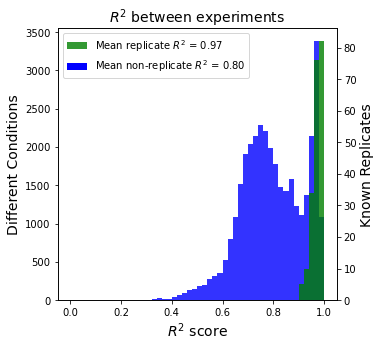

In [48]:
bad_reps,bad_rand = plot_correlations(dataset1)
print('Number of replicates with poor correlations: {}'.format(len(bad_reps)))

/home/anand/miniconda3/envs/pymodulon/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


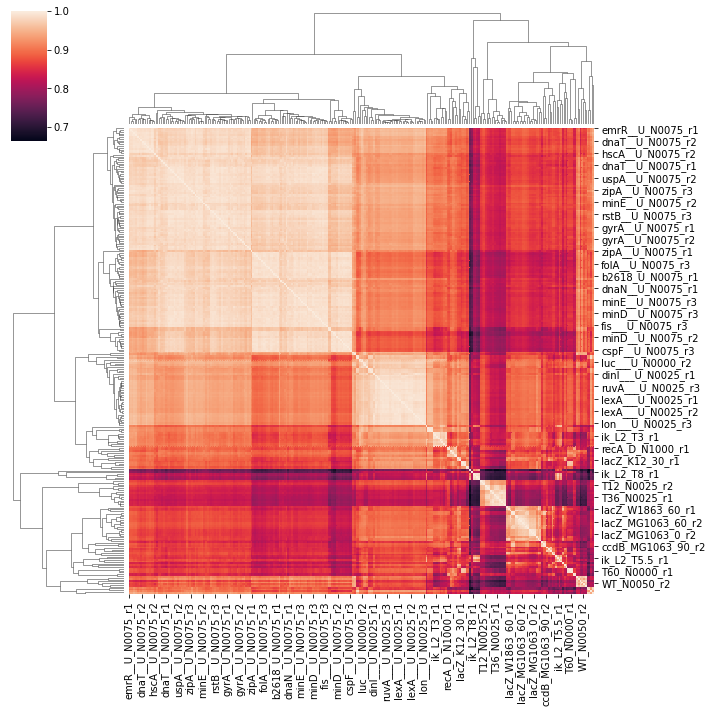

In [49]:
sns.clustermap(dataset1.corr())

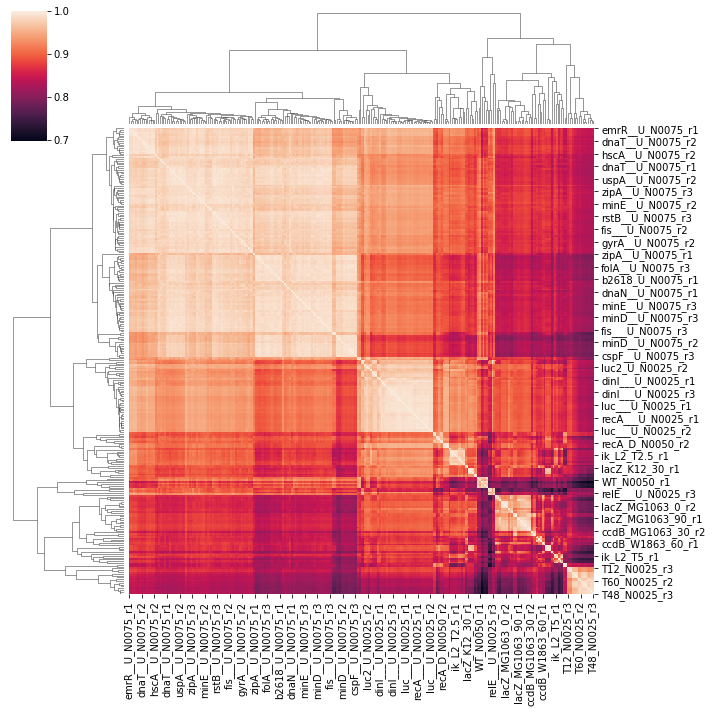

In [50]:
ds1_remove = ['ik_H2_T8_r1','ik_L2_T8_r1','ik_H2_T5_r1','ik_L2_T6_r1','ik_H2_T5.5_r1','ik_H2_T6_r1']
dataset1 = dataset1.drop(ds1_remove,axis=1)
sns.clustermap(dataset1.corr())

<ipython-input-47-4b9c057e5b4e>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name1, name2 in tqdm(list(itertools.combinations(data.columns, 2))):



Number of replicates with poor correlations: 50


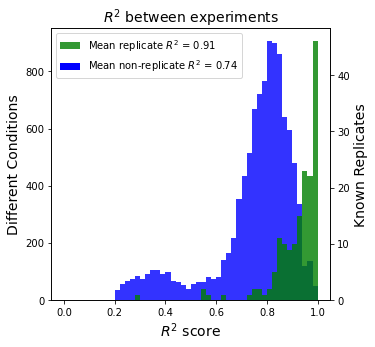

In [51]:
bad_reps, bad_rand = plot_correlations(dataset2)
print('Number of replicates with poor correlations: {}'.format(len(bad_reps)))

In [52]:
len(set([y for (a1,a2),x in bad_reps for y in (a1,a2)]))

56

EC EVOL strains gly1 and gly2 seem to be low quality and should be removed

/home/anand/miniconda3/envs/pymodulon/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


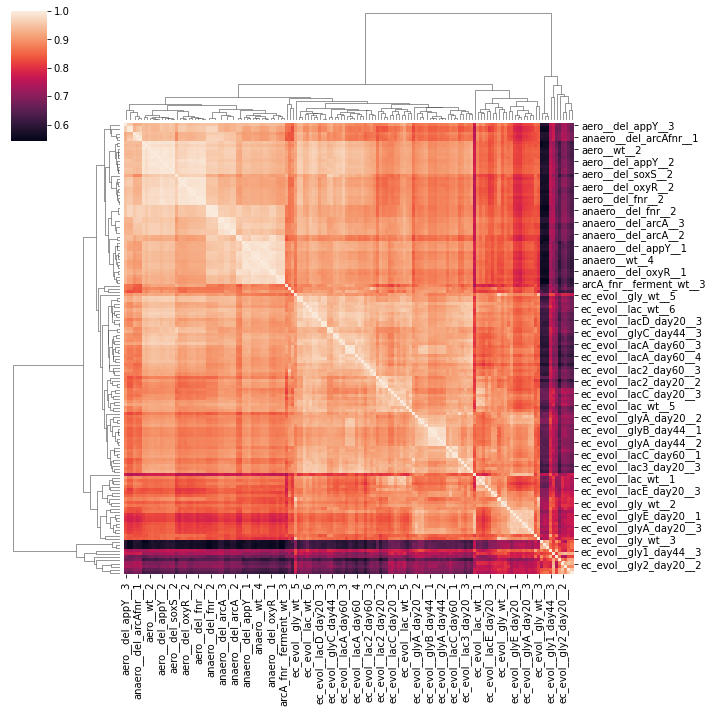

In [53]:
sns.clustermap(dataset2.corr())

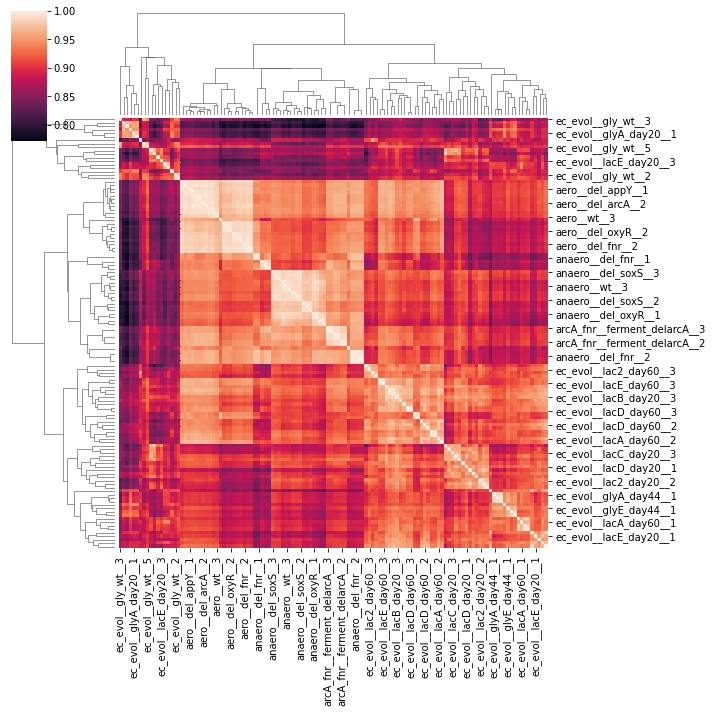

In [54]:
ds2_remove = dataset2.columns[[x.startswith('ec_evol__gly1') or 
                               x.startswith('ec_evol__gly2') or 
                               x.startswith('ec_evol__glyB') or
                               x.startswith('ec_evol__glyD') for x in dataset2.columns]]
dataset2 = dataset2.drop(ds2_remove,axis=1)
sns.clustermap(dataset2.corr())

<ipython-input-47-4b9c057e5b4e>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name1, name2 in tqdm(list(itertools.combinations(data.columns, 2))):



Number of replicates with poor correlations: 0


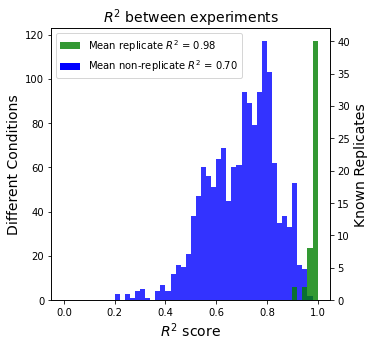

In [55]:
bad_reps,bad_rand = plot_correlations(dataset3)
print('Number of replicates with poor correlations: {}'.format(len(bad_reps)))

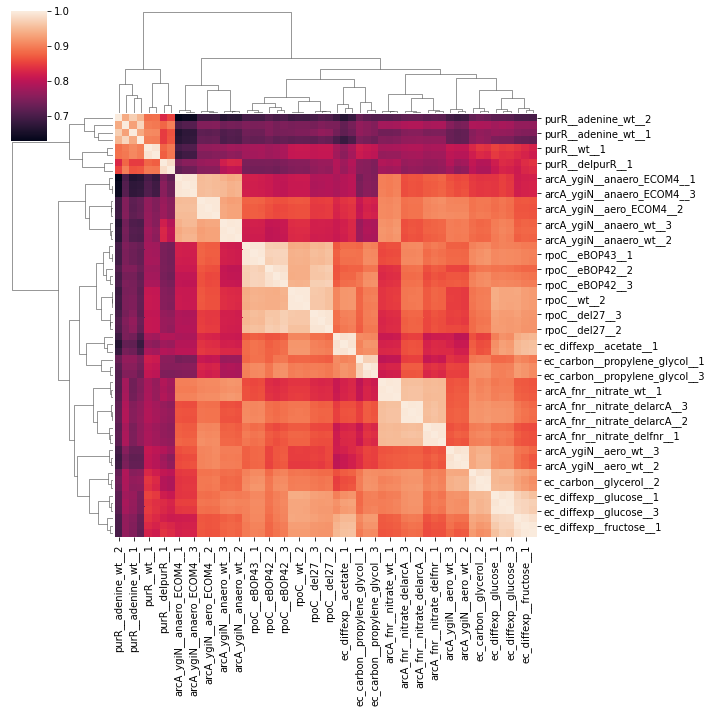

In [56]:
sns.clustermap(dataset3.corr())

<ipython-input-47-4b9c057e5b4e>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name1, name2 in tqdm(list(itertools.combinations(data.columns, 2))):



Number of replicates with poor correlations: 0


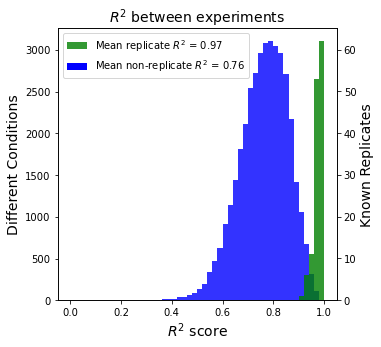

In [57]:
bad_reps,bad_rand = plot_correlations(dataset4)
print('Number of replicates with poor correlations: {}'.format(len(bad_reps)))

/home/anand/miniconda3/envs/pymodulon/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


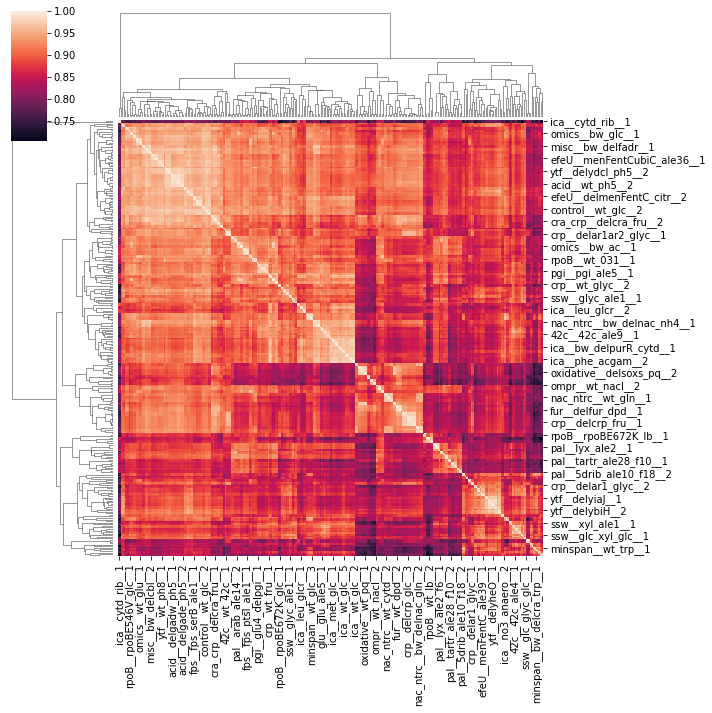

In [58]:
sns.clustermap(dataset4.corr())

<ipython-input-47-4b9c057e5b4e>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name1, name2 in tqdm(list(itertools.combinations(data.columns, 2))):



Number of replicates with poor correlations: 8


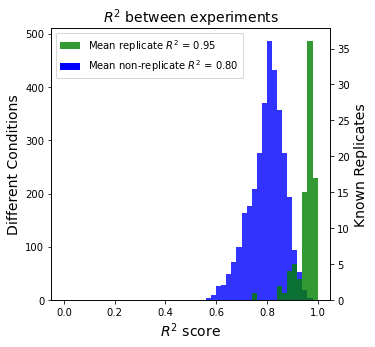

In [59]:
bad_reps,bad_rand = plot_correlations(dataset5)
print('Number of replicates with poor correlations: {}'.format(len(bad_reps)))

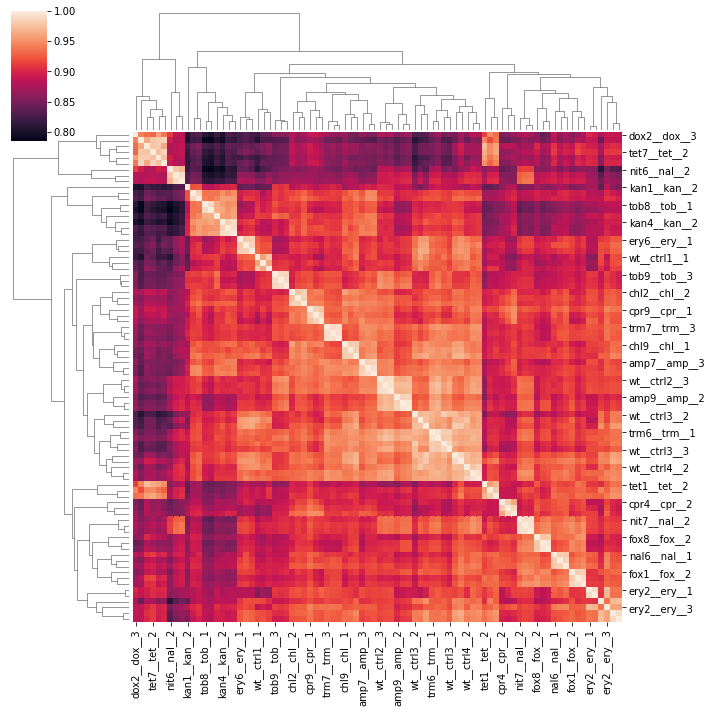

In [60]:
sns.clustermap(dataset5.corr())

# Save datasets

In [61]:
OUT_DIR = '../../data/processed_data'

In [62]:
# Take only the intersection of the genes in the dataset
full_dataset = pd.concat([dataset1, dataset2, dataset3, dataset4,dataset5], join='inner', axis=1)

In [52]:
dataset1.to_csv(os.path.join(OUT_DIR,'MA-1.csv'))
dataset2.to_csv(os.path.join(OUT_DIR,'MA-2.csv'))
dataset3.to_csv(os.path.join(OUT_DIR,'MA-3.csv'))
dataset4.to_csv(os.path.join(OUT_DIR,'RNAseq-1.csv'))
dataset5.to_csv(os.path.join(OUT_DIR,'RNAseq-2.csv'))

In [53]:
full_dataset.to_csv(os.path.join(OUT_DIR,'full-dataset-ind.csv'))

# Subtract baseline expression

In [63]:
# dataset0.to_csv(os.path.join(OUT_DIR,'rcsC2.csv'))
# dataset0_bc = dataset0.sub(dataset0[['Ecoli_untreated_10min_rep1','Ecoli_untreated_10min_rep2','Ecoli_untreated_10min_rep3']].mean(axis=1),axis=0)
# dataset0_bc.to_csv(os.path.join(OUT_DIR,'rcsC2_bc.csv'))

In [64]:
dataset3_part1 = np.where([not x.startswith('purR') for x in dataset3.columns])[0]
dataset3_part2 = np.where([x.startswith('purR') for x in dataset3.columns])[0]

In [65]:
dataset1_bc = dataset1.sub(dataset1[['WT_N0000_r1','WT_N0000_r2']].mean(axis=1),axis=0)
dataset2_bc = dataset2.sub(dataset2[['aero__wt__1','aero__wt__2','aero__wt__3']].mean(axis=1),axis=0)
# Dataset 3 has two distinct clusters that must be internally normalized
dataset3_bc = dataset3.copy()
dataset3_bc.iloc[:,dataset3_part1] = dataset3.sub(dataset3[['ec_diffexp__glucose__1',
                                                 'ec_diffexp__glucose__2',
                                                 'ec_diffexp__glucose__3']].mean(axis=1),axis=0)
dataset3_bc.iloc[:,dataset3_part2] = dataset3.iloc[:,dataset3_part2].sub(dataset3[['purR__wt__1',
                                                                                   'purR__wt__2']].mean(axis=1),axis=0)
dataset4_bc = dataset4.sub(dataset4[['control__wt_glc__1','control__wt_glc__2']].mean(axis=1),axis=0)
dataset5_bc = dataset5.sub(dataset5[['wt__ctrl1__1','wt__ctrl1__2','wt__ctrl1__3']].mean(axis=1),axis=0)

In [67]:
full_dataset_bc = full_dataset.sub(full_dataset[['aero__wt__1','aero__wt__2','aero__wt__3']].mean(axis=1),axis=0)
full_dataset_bc_ind = pd.concat([dataset1_bc, dataset2_bc, dataset3_bc, dataset4_bc,dataset5_bc], join='inner', axis=1)

In [68]:
dataset1_bc.to_csv(os.path.join(OUT_DIR,'MA-1_bc.csv'))
dataset2_bc.to_csv(os.path.join(OUT_DIR,'MA-2_bc.csv'))
dataset3_bc.to_csv(os.path.join(OUT_DIR,'MA-3_bc.csv'))
dataset4_bc.to_csv(os.path.join(OUT_DIR,'RNAseq-1_bc.csv'))
dataset5_bc.to_csv(os.path.join(OUT_DIR,'RNAseq-2_bc.csv'))

full_dataset_bc.to_csv(os.path.join(OUT_DIR,'full-dataset_bc.csv'))
full_dataset_bc_ind.to_csv(os.path.join(OUT_DIR,'full-dataset-ind_bc.csv'))

# Look at correlations after baseline correction

<ipython-input-47-4b9c057e5b4e>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name1, name2 in tqdm(list(itertools.combinations(data.columns, 2))):


([(('relE___U_N0025_r1', 'relE___U_N0025_r3'), 0.8961809383718594),
  (('uvrA___U_N0025_r1', 'uvrA___U_N0025_r2'), 0.8935444555271737),
  (('uvrA___U_N0025_r1', 'uvrA___U_N0025_r3'), 0.8292120582442734),
  (('yebF__U_N0075_r1', 'yebF__U_N0075_r2'), 0.7247526106762704),
  (('yebF__U_N0075_r2', 'yebF__U_N0075_r3'), 0.7893895851357102),
  (('luc___U_N0075_r1', 'luc___U_N0075_r3'), 0.8674287218743775),
  (('luc___U_N0075_r2', 'luc___U_N0075_r3'), 0.8947021725221307),
  (('zipA__U_N0075_r1', 'zipA__U_N0075_r2'), 0.6035917511249047),
  (('zipA__U_N0075_r1', 'zipA__U_N0075_r3'), 0.626630491945402),
  (('luc___U_N0000_r1', 'luc___U_N0000_r3'), 0.7842123841322798),
  (('luc___U_N0000_r2', 'luc___U_N0000_r3'), 0.8516449157369874),
  (('b2618_U_N0075_r1', 'b2618_U_N0075_r2'), 0.8156367778734943),
  (('b2618_U_N0075_r1', 'b2618_U_N0075_r3'), 0.8911138866425349),
  (('b2618_U_N0075_r2', 'b2618_U_N0075_r3'), 0.793976768444261),
  (('bcp___U_N0075_r2', 'bcp___U_N0075_r3'), 0.8711928147230834),
  (('c

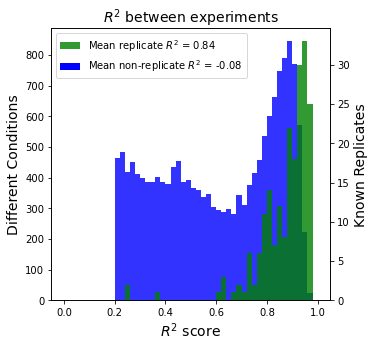

In [67]:
plot_correlations(dataset1_bc)

<ipython-input-47-4b9c057e5b4e>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name1, name2 in tqdm(list(itertools.combinations(data.columns, 2))):


([(('arcA_fnr__ferment_delarcA__1', 'arcA_fnr__ferment_delarcA__2'),
   0.6904766153720149),
  (('arcA_fnr__ferment_delarcA__1', 'arcA_fnr__ferment_delarcA__3'),
   0.7326391782748403),
  (('arcA_fnr__ferment_delarcA__2', 'arcA_fnr__ferment_delarcA__3'),
   0.5061229843676285),
  (('arcA_fnr__ferment_delfnr__1', 'arcA_fnr__ferment_delfnr__2'),
   0.5442516679580396),
  (('arcA_fnr__ferment_delfnr__1', 'arcA_fnr__ferment_delfnr__3'),
   0.5038374674271382),
  (('arcA_fnr__ferment_delfnr__2', 'arcA_fnr__ferment_delfnr__3'),
   0.8782355698234248),
  (('arcA_fnr__ferment_wt__1', 'arcA_fnr__ferment_wt__2'), 0.8509570652357785),
  (('arcA_fnr__ferment_wt__2', 'arcA_fnr__ferment_wt__3'), 0.8713997187092455),
  (('aero__del_appY__1', 'aero__del_appY__2'), 0.48244942904549903),
  (('aero__del_appY__1', 'aero__del_appY__3'), -3.0134446834327218),
  (('aero__del_appY__2', 'aero__del_appY__3'), -3.245359179217348),
  (('aero__del_arcA__1', 'aero__del_arcA__2'), 0.11848707134677972),
  (('aero__de

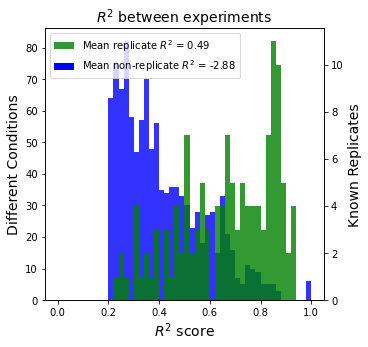

In [68]:
plot_correlations(dataset2_bc)

<ipython-input-47-4b9c057e5b4e>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name1, name2 in tqdm(list(itertools.combinations(data.columns, 2))):


([(('ec_diffexp__glucose__1', 'ec_diffexp__glucose__2'), -2.127925329901159),
  (('ec_diffexp__glucose__1', 'ec_diffexp__glucose__3'), -1.0381909532054938),
  (('ec_diffexp__glucose__2', 'ec_diffexp__glucose__3'), -0.7003344193220935),
  (('ec_diffexp__acetate__1', 'ec_diffexp__acetate__2'), 0.829591788640806),
  (('ec_diffexp__acetate__1', 'ec_diffexp__acetate__3'), 0.8691707712067217),
  (('ec_diffexp__fructose__1', 'ec_diffexp__fructose__2'), 0.7907179847462049),
  (('ec_diffexp__fructose__1', 'ec_diffexp__fructose__3'), 0.8852822400317125),
  (('ec_diffexp__fructose__2', 'ec_diffexp__fructose__3'), 0.4469838185727224),
  (('rpoC__del27__2', 'rpoC__del27__3'), 0.8870001981868647),
  (('rpoC__eBOP42__1', 'rpoC__eBOP42__2'), 0.8951697426706631),
  (('rpoC__eBOP42__2', 'rpoC__eBOP42__3'), 0.8962374576833436),
  (('arcA_ygiN__aero_wt__1', 'arcA_ygiN__aero_wt__3'), 0.873548347395912),
  (('purR__wt__1', 'purR__wt__2'), -3.00530086392929),
  (('purR__delpurR__1', 'purR__delpurR__2'), 0.87

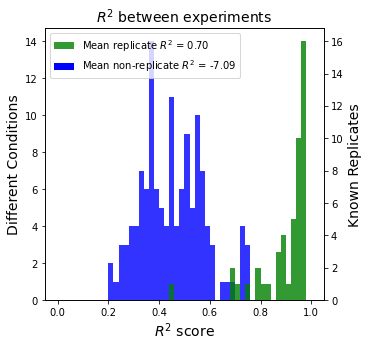

In [69]:
plot_correlations(dataset3_bc)

<ipython-input-47-4b9c057e5b4e>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name1, name2 in tqdm(list(itertools.combinations(data.columns, 2))):


([(('control__wt_glc__1', 'control__wt_glc__2'), -3.0012666978601183),
  (('fur__wt_fe__1', 'fur__wt_fe__2'), 0.7643503241124476),
  (('fur__delfur_fe2__1', 'fur__delfur_fe2__2'), 0.8575048483238978),
  (('acid__wt_ph5__1', 'acid__wt_ph5__2'), 0.8557041595486985),
  (('acid__delgadx_ph5__1', 'acid__delgadx_ph5__2'), 0.7387219451113824),
  (('acid__delgadw_ph5__1', 'acid__delgadw_ph5__2'), 0.8534063657843298),
  (('acid__delgade_ph5__1', 'acid__delgade_ph5__2'), 0.8566265509337971),
  (('nac_ntrc__wt_csn__1', 'nac_ntrc__wt_csn__2'), 0.8668219086376207),
  (('nac_ntrc__wt_cytd__1', 'nac_ntrc__wt_cytd__2'), 0.8624851902259645),
  (('nac_ntrc__wt_gln__1', 'nac_ntrc__wt_gln__2'), 0.8553558221112713),
  (('nac_ntrc__bw_delnac_csn__1', 'nac_ntrc__bw_delnac_csn__2'),
   0.7958316992454599),
  (('nac_ntrc__bw_delnac_gln__1', 'nac_ntrc__bw_delnac_gln__2'),
   0.8307350977351224),
  (('nac_ntrc__bw_delnac_nh4__1', 'nac_ntrc__bw_delnac_nh4__2'),
   0.7232510260574347),
  (('misc__wt_no_te__1', 'mi

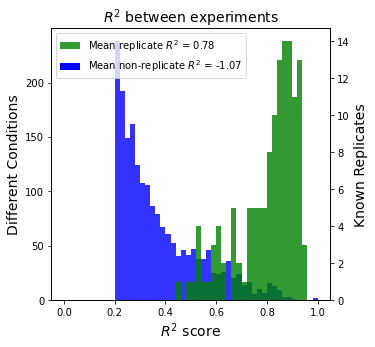

In [70]:
plot_correlations(dataset4_bc)

<ipython-input-47-4b9c057e5b4e>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name1, name2 in tqdm(list(itertools.combinations(data.columns, 2))):


([(('kan1__kan__1', 'kan1__kan__2'), 0.17700979102988545),
  (('kan1__kan__1', 'kan1__kan__3'), 0.8322895605225183),
  (('kan1__kan__2', 'kan1__kan__3'), 0.47211197236773905),
  (('kan4__kan__1', 'kan4__kan__2'), 0.7755686073305523),
  (('kan4__kan__2', 'kan4__kan__3'), 0.8469747642282888),
  (('amp7__amp__1', 'amp7__amp__3'), 0.7715886965081495),
  (('amp7__amp__2', 'amp7__amp__3'), 0.794706292250648),
  (('wt__ctrl1__1', 'wt__ctrl1__2'), -5.730614713777388),
  (('wt__ctrl1__1', 'wt__ctrl1__3'), -1.5948091490291048),
  (('wt__ctrl1__2', 'wt__ctrl1__3'), -1.9800719068048358),
  (('amp9__amp__1', 'amp9__amp__2'), 0.8334961490178383),
  (('amp9__amp__2', 'amp9__amp__3'), 0.8548781269399142),
  (('chl2__chl__1', 'chl2__chl__2'), 0.7400864276762976),
  (('chl2__chl__1', 'chl2__chl__3'), 0.8328977985427236),
  (('chl2__chl__2', 'chl2__chl__3'), 0.8424270178734601),
  (('chl9__chl__1', 'chl9__chl__2'), 0.721207770700425),
  (('chl9__chl__1', 'chl9__chl__3'), 0.7547684315803039),
  (('chl9__c

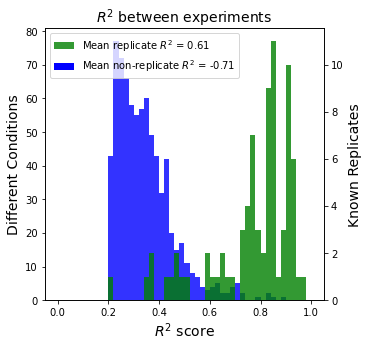

In [71]:
plot_correlations(dataset5_bc)